In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/food_data/FoodImage-20230713T175424Z-001.zip' # Give the drive link for data(https://drive.google.com/drive/folders/1TM8EB4IruH7JDyIDb3BAc8nzMmKoKZIV?usp=drive_link)

# Directory to extract the contents to
extract_path = '/content/food_data/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
print("Extracted files:")
for file in extracted_files:
    print(file)


Extracted files:
FoodImage


In [1]:
#import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_hub as hub
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.30)

In [3]:
#Resize Image

img_width = 224
img_height = 224

In [4]:
train_data_generator = datagen.flow_from_directory(directory='/content/food_data/FoodImage',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'categorical',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 351 images belonging to 6 classes.


In [5]:
validation_data_generator = datagen.flow_from_directory(directory='/content/food_data/FoodImage',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'categorical',
                                                   batch_size = 16,
                                                   shuffle=False,
                                                   subset = 'validation'
                                                   )

Found 146 images belonging to 6 classes.


In [6]:
# Setup input shape to the model
INPUT_SHAPE = [None, img_width, img_height, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = 6 # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [7]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL, dropout_rate=0.2):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [8]:
# Create a model and check its details
model = create_model(dropout_rate=0.45)
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 6)                 6012      
                                                                 
Total params: 5,438,725
Trainable params: 6,012
Non-trainable params: 5,432,713
_________________________________________________________________


In [9]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_acc",
                                                  patience=3) # stops after 3 rounds of no improvements

In [10]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 10

In [11]:
# Modify the train_model() function to return history
def train_model():
    """
    Trains a given model and returns the trained version.
    """
    # Create a model
    model = create_model()

    # Fit the model to the data passing it the callbacks we created
    history = model.fit(
        x=train_data_generator,
        epochs=NUM_EPOCHS,
        validation_data=validation_data_generator,
        validation_freq=1,  # check validation metrics every epoch
        callbacks=[early_stopping]
    )

    return model, history

In [12]:
# Train the model and obtain the trained model and history
model, history = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/10
22/22 [==============================] - ETA: 0s - loss: 1.3712 - accuracy: 0.4558

22/22 [==============================] - 52s 2s/step - loss: 1.3712 - accuracy: 0.4558 - val_loss: 0.7852 - val_accuracy: 0.7397
Epoch 2/10
22/22 [==============================] - ETA: 0s - loss: 0.3289 - accuracy: 0.9003

22/22 [==============================] - 28s 1s/step - loss: 0.3289 - accuracy: 0.9003 - val_loss: 0.4912 - val_accuracy: 0.8082
Epoch 3/10
22/22 [==============================] - ETA: 0s - loss: 0.1552 - accuracy: 0.9744

22/22 [==============================] - 28s 1s/step - loss: 0.1552 - accuracy: 0.9744 - val_loss: 0.4255 - val_accuracy: 0.8356
Epoch 4/10
22/22 [==============================] - ETA: 0s - loss: 0.0976 - accuracy: 0.9972

22/22 [==============================] - 28s 1s/step - loss: 0.0976 - accuracy: 0.9972 - val_loss: 0.3816 - val_accuracy: 0.8425
Epoch 5/10
22/22 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 1.0000

22/22 [==============================] - 28s 1s/step - loss: 0.0687 - accuracy: 1.0000 - val_loss: 0.3564 - val_accuracy: 0.8630
Epoch 6/10
22/22 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 1.0000

22/22 [==============================] - 28s 1s/step - loss: 0.0540 - accuracy: 1.0000 - val_loss: 0.3353 - val_accuracy: 0.8836
Epoch 7/10
22/22 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 1.0000

22/22 [==============================] - 29s 1s/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.3223 - val_accuracy: 0.8767
Epoch 8/10
22/22 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 1.0000

22/22 [==============================] - 29s 1s/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.3117 - val_accuracy: 0.8767
Epoch 9/10
22/22 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 1.0000

22/22 [==============================] - 29s 1s/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 0.3069 - val_accuracy: 0.8904
Epoch 10/10
22/22 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 1.0000

22/22 [==============================] - 29s 1s/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.2946 - val_accuracy: 0.8836


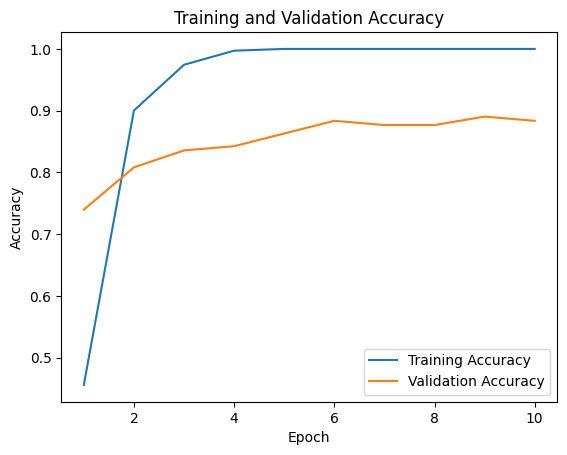

In [13]:
# Access the training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [14]:
# Get the class labels
class_labels = list(validation_data_generator.class_indices.keys())

# Print the class labels
print(class_labels)

['ApplePie', 'BagelSandwich', 'Bibimbop', 'Bread', 'FriedRice', 'Pork']


In [15]:
# Get the total number of samples in the validation dataset
num_samples = len(validation_data_generator.filenames)

# Get the batch size used in the generator
batch_size = validation_data_generator.batch_size

# Calculate the number of steps required to iterate through the entire dataset
num_steps = int(np.ceil(num_samples / batch_size))

# Initialize empty arrays to store the images and labels
x_test = []
y_true = []

# Iterate through the generator to obtain the images and labels
for _ in range(num_steps):
    images, labels = validation_data_generator.next()
    x_test.extend(images)
    y_true.extend(np.argmax(labels, axis=1))

# Convert the arrays to NumPy arrays
x_test = np.array(x_test)
y_true = np.array(y_true)

In [16]:
# Get the predictions and convert predictions to class labels
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

5/5 [==============================] - 3s 189ms/step


In [17]:
# Load the confusion matrix
cm = confusion_matrix(y_true, y_pred)

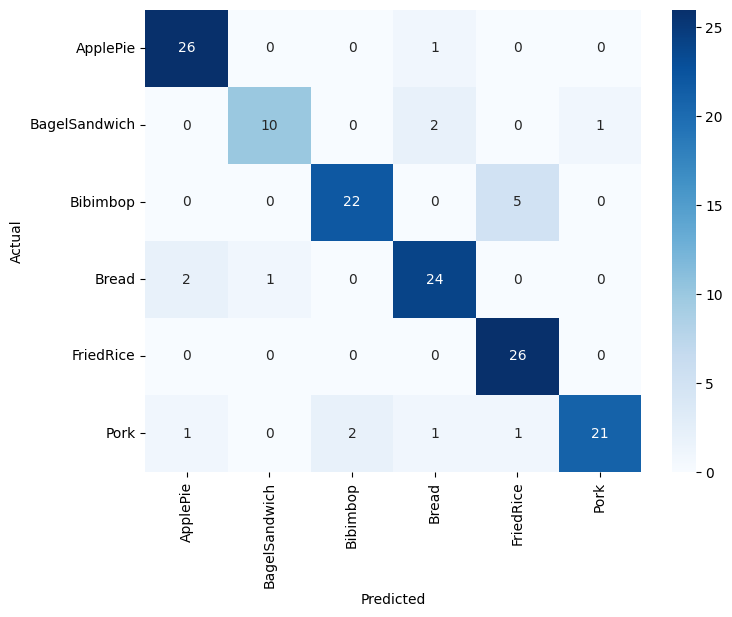

In [18]:
# Get the class labels
class_labels = list(validation_data_generator.class_indices.keys())

# Display the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
#Print Precision, Recall, F-score
print(classification_report(validation_data_generator.classes[validation_data_generator.index_array], y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.91      0.77      0.83        13
           2       0.92      0.81      0.86        27
           3       0.86      0.89      0.87        27
           4       0.81      1.00      0.90        26
           5       0.95      0.81      0.88        26

    accuracy                           0.88       146
   macro avg       0.89      0.87      0.88       146
weighted avg       0.89      0.88      0.88       146

